# **codeByte:**

## Data Loading
Change the data loading method change the paths to run this(I've uploaded datasets)

In [9]:
import pandas as pd
og_file_path = '/kaggle/input/mpa-and-fishery-consumption-2017-2022/og-unclean-data.csv'
spatial_file_path = '/kaggle/input/mpa-and-fishery-country-wise/Spatial-unclean-data.csv'
temporal_file_path = '/kaggle/input/global-mpa-and-fishery-consumption/Temporal-unclean-data.csv'

In [10]:
og_data = pd.read_csv(og_file_path)
print(og_data.head())
spatial_data = pd.read_csv(spatial_file_path)
print(spatial_data.head())
temporal_data = pd.read_csv(temporal_file_path)
print(temporal_data.head())

                  Country Name        2017        2018        2019  \
0                        Aruba      149.50      150.00      164.50   
1  Africa Eastern and Southern  3897511.90  3883753.45  3821770.86   
2                  Afghanistan     9000.00    10000.00    10729.00   
3   Africa Western and Central  3706566.44  3642143.61  3667626.70   
4                       Angola   532914.00   444858.00   401696.00   

         2020        2021        2022    2017.1    2018.1    2019.1    2020.1  \
0      161.50      166.50      173.50  0.000105  0.000105  0.000105  0.000105   
1  3805060.99  4097350.48  3725334.12  4.945690  4.945687  5.235880  5.036564   
2    11444.00    12907.00    13150.00       NaN       NaN       NaN       NaN   
3  3523165.88  3701624.19  3894655.40       NaN       NaN       NaN       NaN   
4   376515.00   531522.00   471672.00  0.004930  0.004930  0.004930  0.004930   

     2021.1    2022.1  Unnamed: 13 Unnamed: 14  
0  0.000105  0.000105          NaN         

## Data Preprocessing



### Data Cleaning
1. Missing Values

In [11]:
og_data_cleaned = og_data.drop(columns=['Unnamed: 13', 'Unnamed: 14'])
spatial_data_cleaned = spatial_data.drop(columns=['Unnamed: 3'])
temporal_data_cleaned = temporal_data.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

og_data_cleaned.fillna(method='ffill', inplace=True)

spatial_data_cleaned.dropna(subset=['MPA', 'Fishery'], inplace=True)
temporal_data_cleaned.dropna(subset=['MPA', 'FisheryConsumption'], inplace=True)

cleaned_og_data = og_data_cleaned
cleaned_spatial_data = spatial_data_cleaned
cleaned_temporal_data = temporal_data_cleaned

cleaned_og_data_path = '/kaggle/working/cleaned_og_data.csv'
cleaned_spatial_data_path = '/kaggle/working/cleaned_spatial_data.csv'
cleaned_temporal_data_path = '/kaggle/working/cleaned_temporal_data.csv'

try:
    cleaned_og_data.to_csv(cleaned_og_data_path, index=False)
    cleaned_spatial_data.to_csv(cleaned_spatial_data_path, index=False)
    cleaned_temporal_data.to_csv(cleaned_temporal_data_path, index=False)
    print("Cleaned data saved successfully.")
except Exception as e:
    print(f"Error saving cleaned data: {e}")
cleaned_og_data.head(), cleaned_spatial_data.head(), cleaned_temporal_data.head()

Cleaned data saved successfully.


/tmp/ipykernel_24/3923138118.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  og_data_cleaned.fillna(method='ffill', inplace=True)


(                  Country Name        2017        2018        2019  \
 0                        Aruba      149.50      150.00      164.50   
 1  Africa Eastern and Southern  3897511.90  3883753.45  3821770.86   
 2                  Afghanistan     9000.00    10000.00    10729.00   
 3   Africa Western and Central  3706566.44  3642143.61  3667626.70   
 4                       Angola   532914.00   444858.00   401696.00   
 
          2020        2021        2022    2017.1    2018.1    2019.1    2020.1  \
 0      161.50      166.50      173.50  0.000105  0.000105  0.000105  0.000105   
 1  3805060.99  4097350.48  3725334.12  4.945690  4.945687  5.235880  5.036564   
 2    11444.00    12907.00    13150.00  4.945690  4.945687  5.235880  5.036564   
 3  3523165.88  3701624.19  3894655.40  4.945690  4.945687  5.235880  5.036564   
 4   376515.00   531522.00   471672.00  0.004930  0.004930  0.004930  0.004930   
 
      2021.1    2022.1  
 0  0.000105  0.000105  
 1  5.040512  0.000105  
 2 

2. Encoding

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

og_data_cleaned = cleaned_og_data
spatial_data_cleaned = cleaned_spatial_data
temporal_data_cleaned = cleaned_temporal_data

categorical_columns = ['Country Name']

for col in categorical_columns:
    og_data_cleaned[col] = label_encoder.fit_transform(og_data_cleaned[col])

for col in categorical_columns:
    spatial_data_cleaned[col] = label_encoder.fit_transform(spatial_data_cleaned[col])

cleaned_og_data = og_data_cleaned
cleaned_spatial_data = spatial_data_cleaned
cleaned_temporal_data = temporal_data_cleaned

cleaned_og_data_path = '/kaggle/working/cleaned_encoded_og_data.csv'
cleaned_spatial_data_path = '/kaggle/working/cleaned_encoded_spatial_data.csv'
cleaned_temporal_data_path = '/kaggle/working/cleaned_encoded_temporal_data.csv'

cleaned_og_data.to_csv(cleaned_og_data_path, index=False)
cleaned_spatial_data.to_csv(cleaned_spatial_data_path, index=False)
cleaned_temporal_data.to_csv(cleaned_temporal_data_path, index=False)

cleaned_og_data.head(), cleaned_spatial_data.head(), cleaned_temporal_data.head()

(   Country Name        2017        2018        2019        2020        2021  \
 0            12      149.50      150.00      164.50      161.50      166.50   
 1             1  3897511.90  3883753.45  3821770.86  3805060.99  4097350.48   
 2             0     9000.00    10000.00    10729.00    11444.00    12907.00   
 3             2  3706566.44  3642143.61  3667626.70  3523165.88  3701624.19   
 4             7   532914.00   444858.00   401696.00   376515.00   531522.00   
 
          2022    2017.1    2018.1    2019.1    2020.1    2021.1    2022.1  
 0      173.50  0.000105  0.000105  0.000105  0.000105  0.000105  0.000105  
 1  3725334.12  4.945690  4.945687  5.235880  5.036564  5.040512  0.000105  
 2    13150.00  4.945690  4.945687  5.235880  5.036564  5.040512  0.000105  
 3  3894655.40  4.945690  4.945687  5.235880  5.036564  5.040512  0.000105  
 4   471672.00  0.004930  0.004930  0.004930  0.004930  0.004930  0.004930  ,
    Country Name       Fishery       MPA
 0            

3. Standardization and Normalization

In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
og_data = cleaned_og_data
spatial_data = cleaned_spatial_data
temporal_data = cleaned_temporal_data

datasets = {
    'og_data': og_data,
    'spatial_data': spatial_data,
    'temporal_data': temporal_data
}

for name, data in datasets.items(): 
  categorical_columns = ['Country Name']
  if 'Country Name' in data.columns:
    encoder = OneHotEncoder(sparse=False)
    encoded_categories = encoder.fit_transform(data[categorical_columns])

    encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categorical_columns))

    data = data.drop(categorical_columns, axis=1)
    data = pd.concat([data, encoded_df], axis=1)

  scaler = MinMaxScaler()
  normalized_data = scaler.fit_transform(data)


  standardizer = StandardScaler()
  standardized_data = standardizer.fit_transform(data)

  normalized_df = pd.DataFrame(normalized_data, columns=data.columns)
  standardized_df = pd.DataFrame(standardized_data, columns=data.columns)


  normalized_df.to_csv(f'/kaggle/working/{name}-nrm.csv', index=False)
  standardized_df.to_csv(f'/kaggle/working/{name}-std.csv', index=False)

  print(f"Encoded and Normalized {name} Data:")
  print(normalized_df.head())

  print(f"\nEncoded and Standardized {name} Data:")
  print(standardized_df.head())

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Encoded and Normalized og_data Data:
           2017          2018          2019          2020          2021  \
0  4.465208e-07  4.116628e-07  4.329412e-07  8.553970e-08  1.650334e-07   
1  1.901961e-02  1.837668e-02  1.808274e-02  1.795210e-02  1.888238e-02   
2  4.363704e-05  4.701946e-05  5.041991e-05  5.331784e-05  5.888069e-05   
3  1.808779e-02  1.723344e-02  1.735339e-02  1.662208e-02  1.705864e-02   
4  2.600342e-03  2.104662e-03  1.900319e-03  1.775770e-03  2.448961e-03   

           2022    2017.1    2018.1    2019.1    2020.1  ...  \
0  3.979066e-08  0.000001  0.000001  0.000001  0.000001  ...   
1  1.743846e-02  0.049457  0.049540  0.052359  0.050366  ...   
2  6.078609e-05  0.049457  0.049540  0.052359  0.050366  ...   
3  1.823110e-02  0.049457  0.049540  0.052359  0.050366  ...   
4  2.207244e-03  0.000049  0.000049  0.000049  0.000049  ...   

   Country Name_256  Country Name_257  Country Name_258  Country Name_259  \
0               0.0               0.0             

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Loading all the output dataset paths

In [15]:
# Original unclean data
og_file_path = '/kaggle/input/mpa-and-fishery-consumption-2017-2022/og-unclean-data.csv'
spatial_file_path = '/kaggle/input/mpa-and-fishery-country-wise/Spatial-unclean-data.csv'
temporal_file_path = '/kaggle/input/global-mpa-and-fishery-consumption/Temporal-unclean-data.csv'

# Cleaned data
cleaned_og_data_path = '/kaggle/working/cleaned_og_data.csv'
cleaned_spatial_data_path = '/kaggle/working/cleaned_spatial_data.csv'
cleaned_temporal_data_path = '/kaggle/working/cleaned_temporal_data.csv'

# Cleaned and encoded data
cleaned_encoded_og_data_path = '/kaggle/working/cleaned_encoded_og_data.csv'
cleaned_encoded_spatial_data_path = '/kaggle/working/cleaned_encoded_spatial_data.csv'
cleaned_encoded_temporal_data_path = '/kaggle/working/cleaned_encoded_temporal_data.csv'

# Normalized and standardized data
og_data_nrm_path = '/kaggle/working/og_data-nrm.csv'
og_data_std_path = '/kaggle/working/og_data-std.csv'
spatial_data_nrm_path = '/kaggle/working/spatial_data-nrm.csv'
spatial_data_std_path = '/kaggle/working/spatial_data-std.csv'
temporal_data_nrm_path = '/kaggle/working/temporal_data-nrm.csv'
temporal_data_std_path = '/kaggle/working/temporal_data-std.csv'



## Descriptive Analysis


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

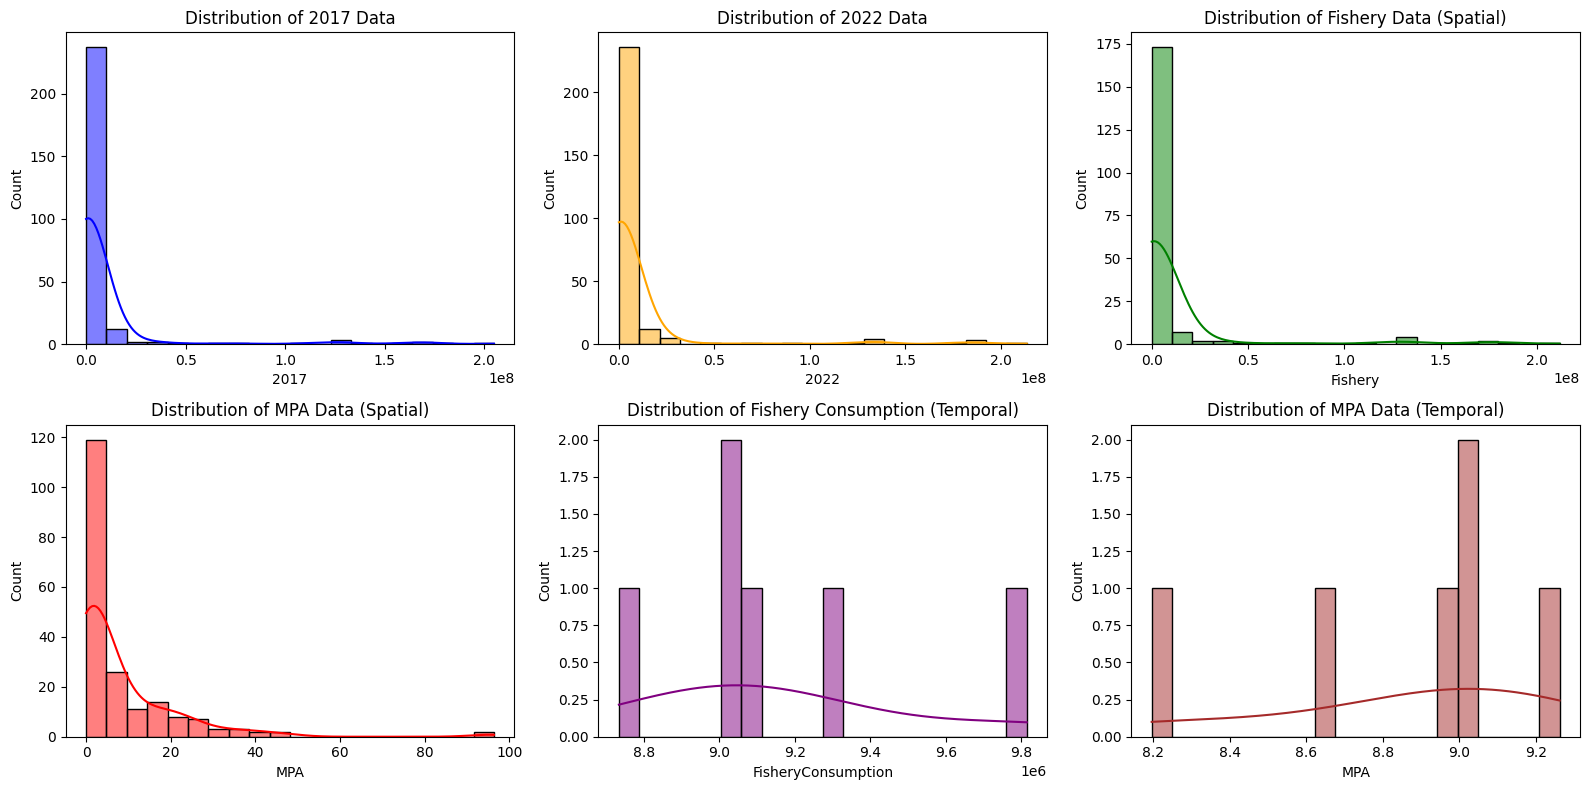

(               2017          2018          2019          2020          2021  \
 count  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02   
 mean   8.177468e+06  8.445523e+06  8.461595e+06  8.497123e+06  8.704376e+06   
 std    2.957357e+07  3.047498e+07  3.061605e+07  3.084114e+07  3.152794e+07   
 min    5.800000e+01  6.300000e+01  7.300000e+01  1.433700e+02  1.306900e+02   
 25%    1.840289e+04  1.706722e+04  1.737274e+04  1.759810e+04  1.828250e+04   
 50%    1.227746e+05  1.341336e+05  1.323479e+05  1.354821e+05  1.459569e+05   
 75%    1.684218e+06  1.738210e+06  1.775223e+06  1.696403e+06  1.764359e+06   
 max    2.049177e+08  2.113381e+08  2.113452e+08  2.119485e+08  2.169865e+08   
 
                2022      2017.1      2018.1      2019.1      2020.1  \
 count  2.660000e+02  266.000000  266.000000  266.000000  266.000000   
 mean   8.734718e+06    9.187747    8.791554    9.547062    9.563960   
 std    3.177244e+07   17.367768   16.431549   17.769860   17.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

og_data = pd.read_csv(cleaned_og_data_path)
spatial_data = pd.read_csv(cleaned_spatial_data_path)
temporal_data = pd.read_csv(cleaned_temporal_data_path)

og_data_stats = og_data.describe()
spatial_data_stats = spatial_data.describe()
temporal_data_stats = temporal_data.describe()

plt.figure(figsize=(16, 8))

# Original Data (Fishery, MPA from og_data)
plt.subplot(2, 3, 1)
sns.histplot(og_data['2017'], kde=True, bins=20, color='blue')
plt.title('Distribution of 2017 Data')

plt.subplot(2, 3, 2)
sns.histplot(og_data['2022'], kde=True, bins=20, color='orange')
plt.title('Distribution of 2022 Data')

# Spatial Data
plt.subplot(2, 3, 3)
sns.histplot(spatial_data['Fishery'], kde=True, bins=20, color='green')
plt.title('Distribution of Fishery Data (Spatial)')

plt.subplot(2, 3, 4)
sns.histplot(spatial_data['MPA'], kde=True, bins=20, color='red')
plt.title('Distribution of MPA Data (Spatial)')

# Temporal Data
plt.subplot(2, 3, 5)
sns.histplot(temporal_data['FisheryConsumption'], kde=True, bins=20, color='purple')
plt.title('Distribution of Fishery Consumption (Temporal)')

plt.subplot(2, 3, 6)
sns.histplot(temporal_data['MPA'], kde=True, bins=20, color='brown')
plt.title('Distribution of MPA Data (Temporal)')

plt.tight_layout()
plt.show()

og_data_stats, spatial_data_stats, temporal_data_stats

## Exploratory Data Analysis


Temporal Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                6 non-null      int64  
 1   MPA                 6 non-null      float64
 2   FisheryConsumption  6 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 272.0 bytes
None

Spatial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  197 non-null    object 
 1   Fishery       197 non-null    float64
 2   MPA           197 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.7+ KB
None

Temporal Data Summary Statistics:
              Year       MPA  FisheryConsumption
count     6.000000  6.000000        6.000000e+00
mean   2019.500000  8.861797        9.159927e+

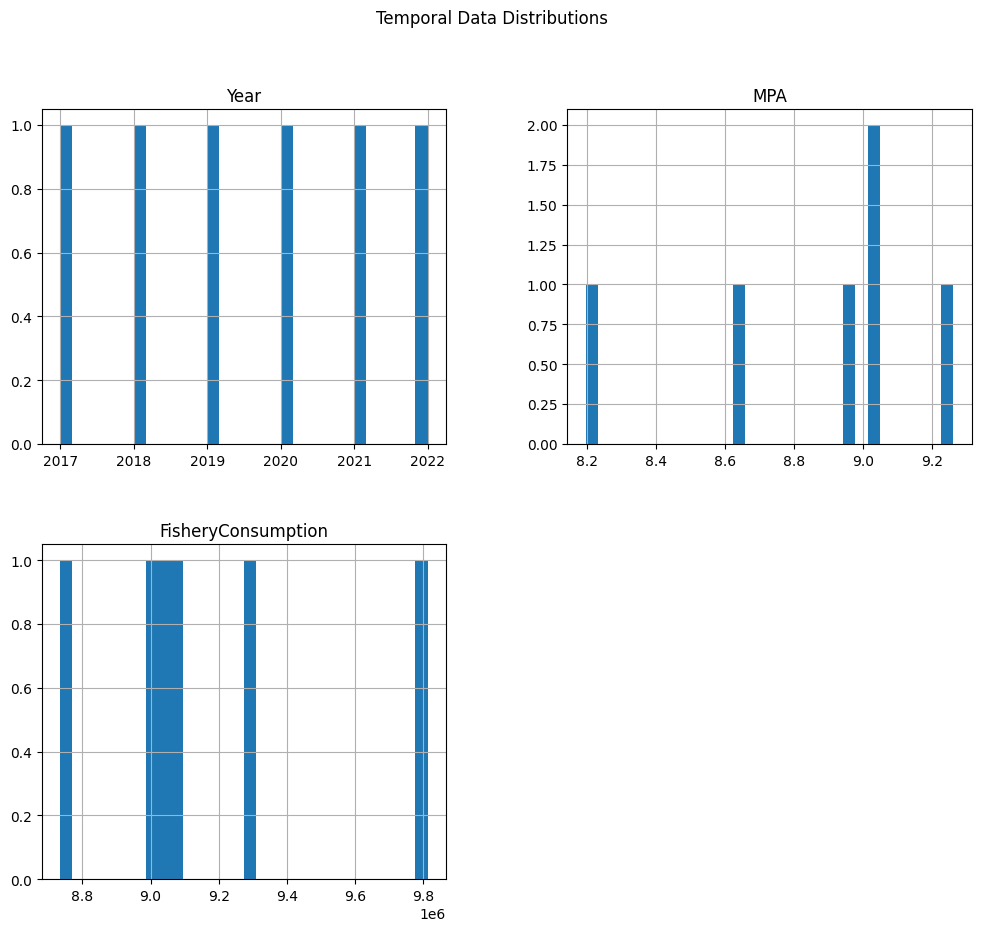

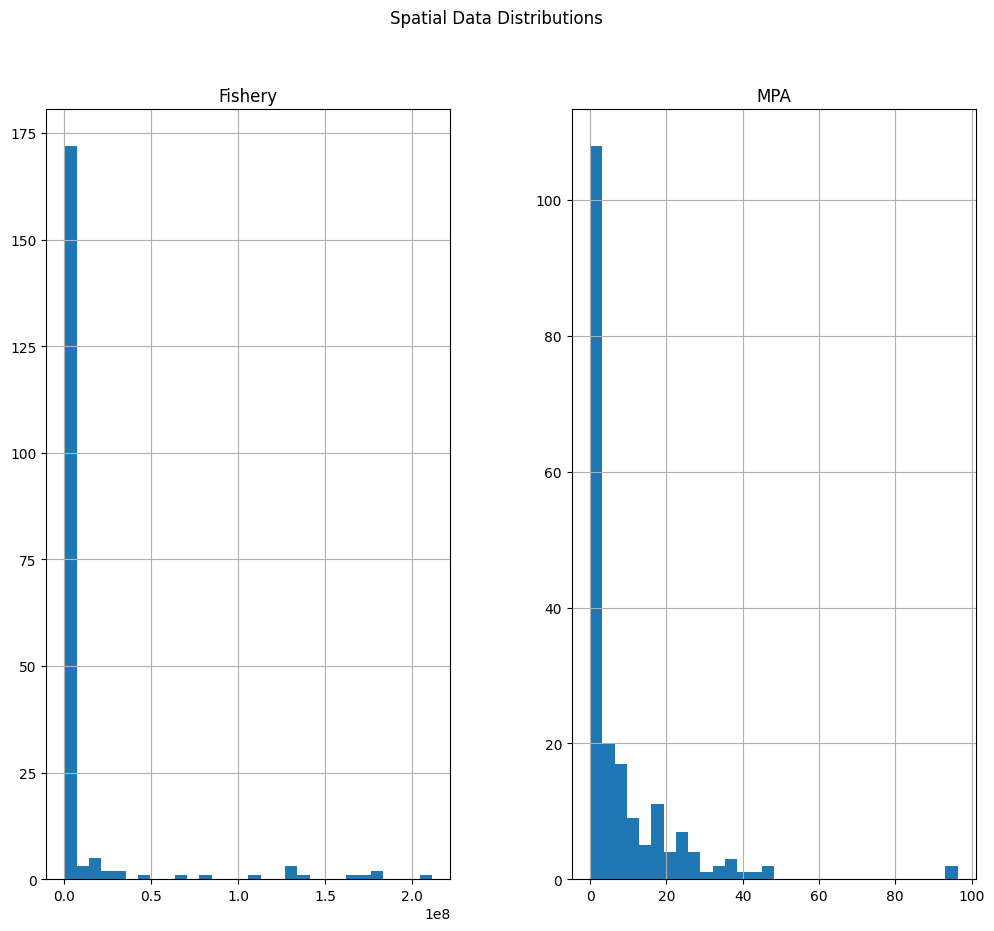


Missing Values in Temporal Data:
Year                  0
MPA                   0
FisheryConsumption    0
dtype: int64

Missing Values in Spatial Data:
Country Name    0
Fishery         0
MPA             0
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


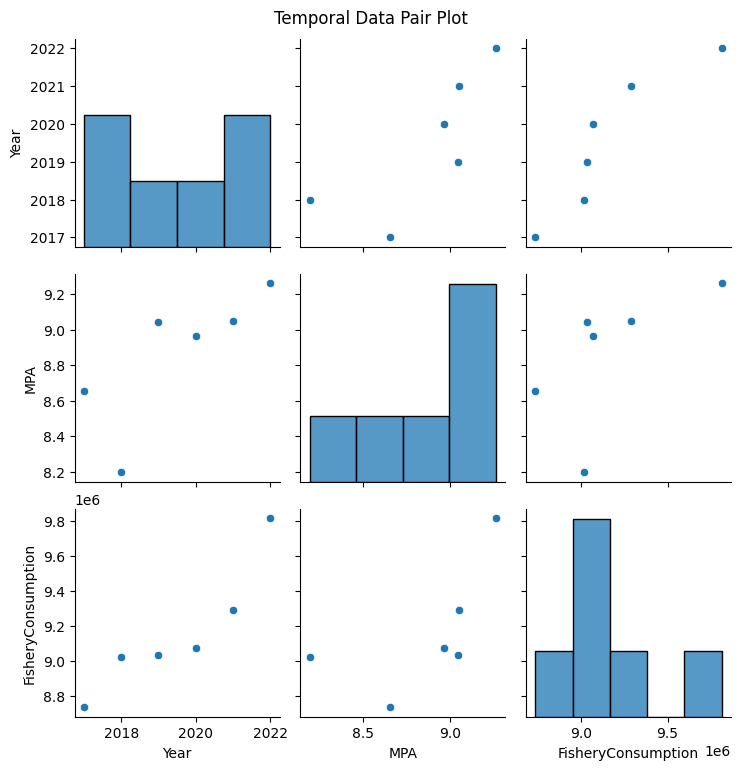

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


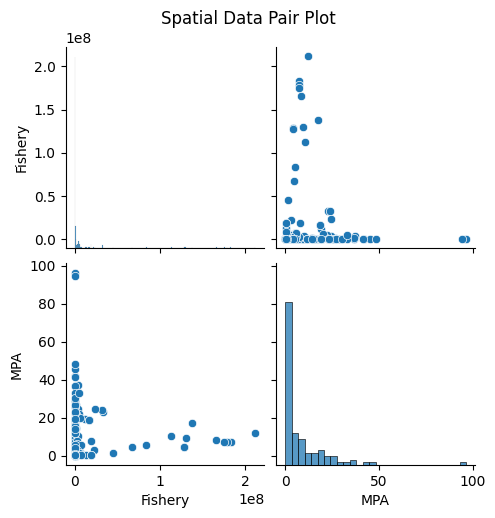

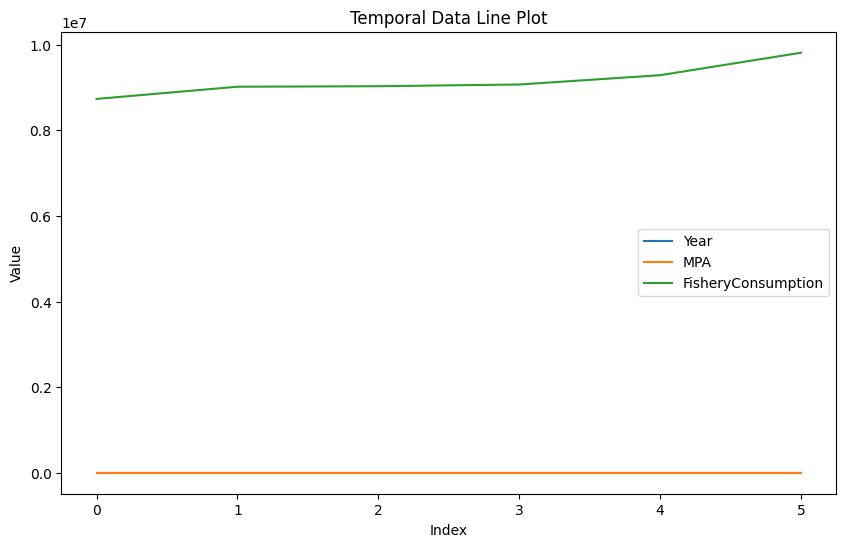

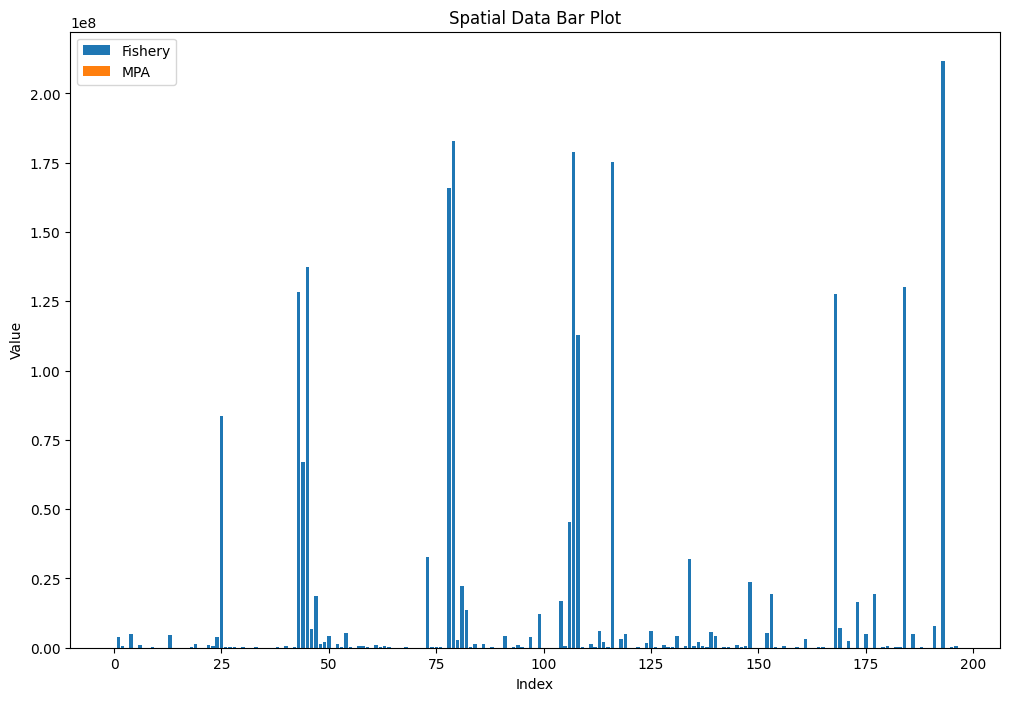

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_og_data_path = '/kaggle/working/cleaned_og_data.csv'
cleaned_spatial_data_path = '/kaggle/working/cleaned_spatial_data.csv'
cleaned_temporal_data_path = '/kaggle/working/cleaned_temporal_data.csv'

temporal_df= pd.read_csv(cleaned_temporal_data_path)
spatial_df= pd.read_csv(cleaned_spatial_data_path)

print("Temporal Data Info:")
print(temporal_df.info())
print("\nSpatial Data Info:")
print(spatial_df.info())

print("\nTemporal Data Summary Statistics:")
print(temporal_df.describe())
print("\nSpatial Data Summary Statistics:")
print(spatial_df.describe())
print("\nFirst Few Rows of Temporal Data:")
print(temporal_df.head())
print("\nFirst Few Rows of Spatial Data:")
print(spatial_df.head())

temporal_df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Temporal Data Distributions')
plt.show()

spatial_df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Spatial Data Distributions')
plt.show()

print("\nMissing Values in Temporal Data:")
print(temporal_df.isnull().sum())
print("\nMissing Values in Spatial Data:")
print(spatial_df.isnull().sum())

sns.pairplot(temporal_df)
plt.suptitle('Temporal Data Pair Plot', y=1.02)
plt.show()

numeric_cols = spatial_df.select_dtypes(include=['float', 'int']).columns

sns.pairplot(spatial_df[numeric_cols])
plt.suptitle('Spatial Data Pair Plot', y=1.02)
plt.show()

plt.figure(figsize=(10, 6))
for column in temporal_df.columns:
    if pd.api.types.is_numeric_dtype(temporal_df[column]):
        plt.plot(temporal_df[column], label=column)
plt.title('Temporal Data Line Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
for column in numeric_cols:
    plt.bar(spatial_df.index, spatial_df[column], label=column)
plt.title('Spatial Data Bar Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

## Correlational Analysis

- Handling Outliers


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

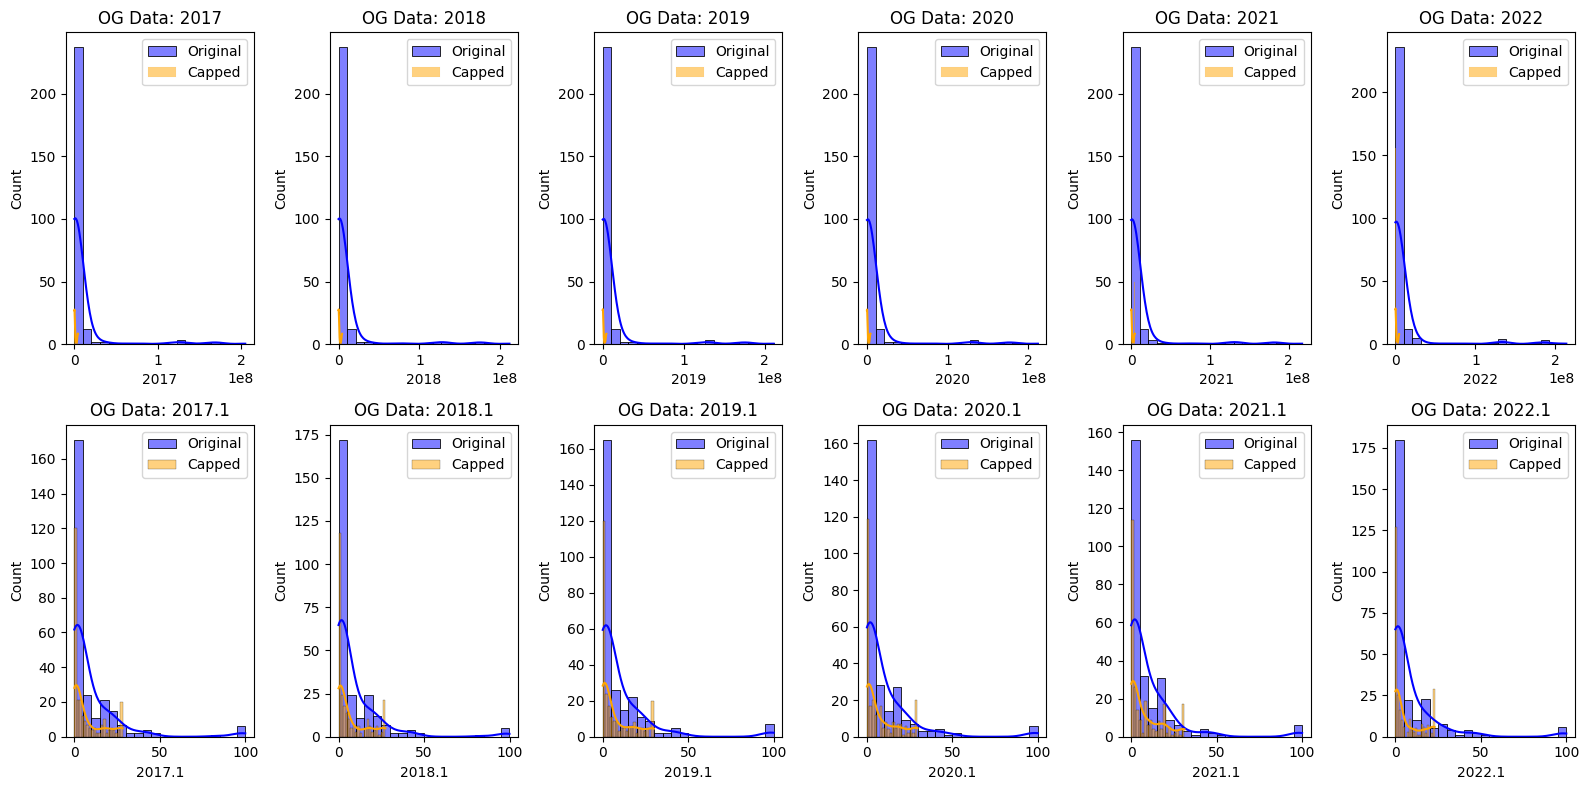

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

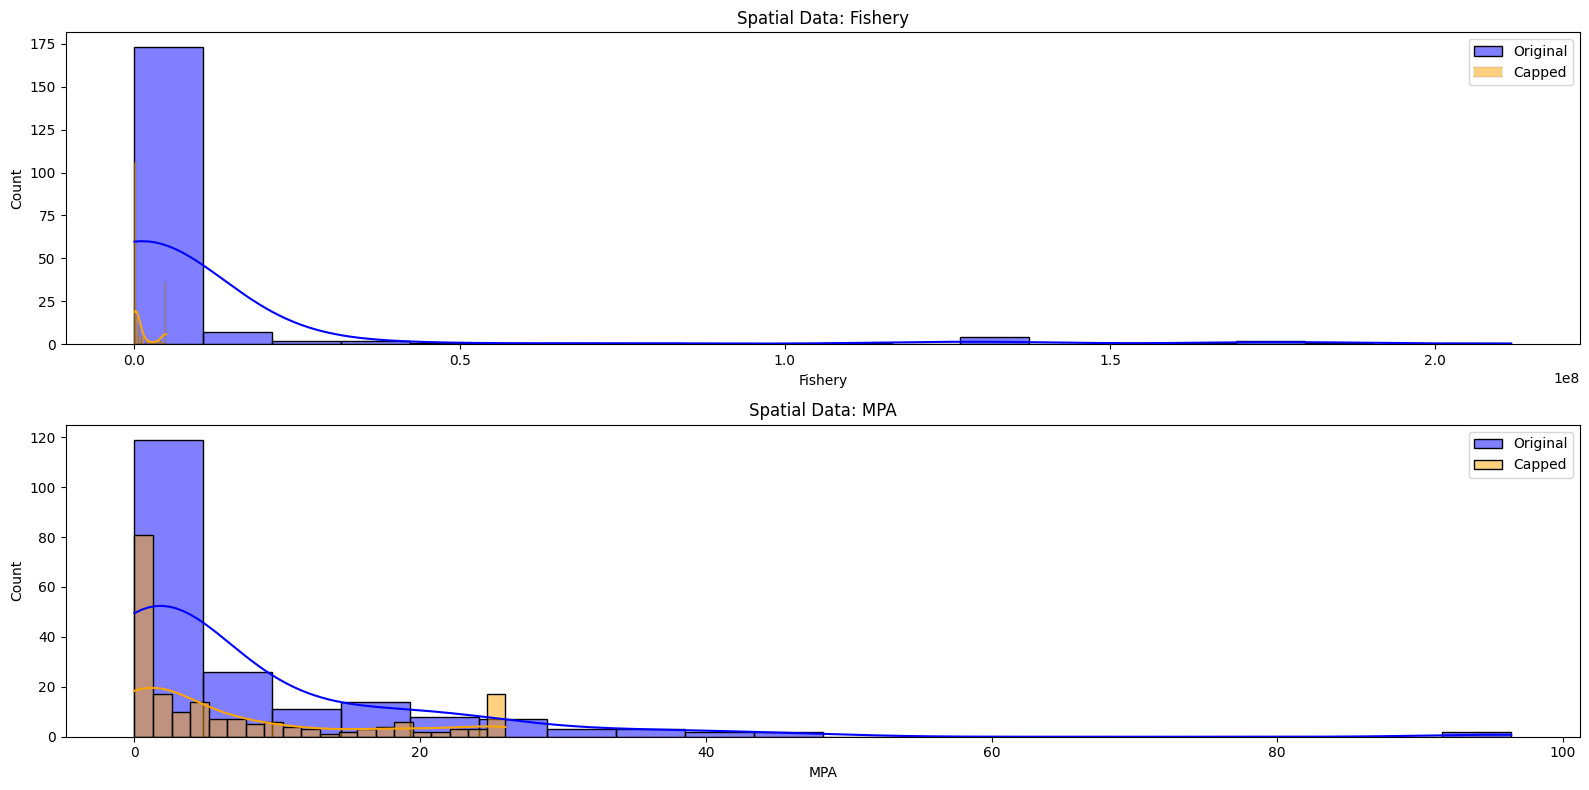

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

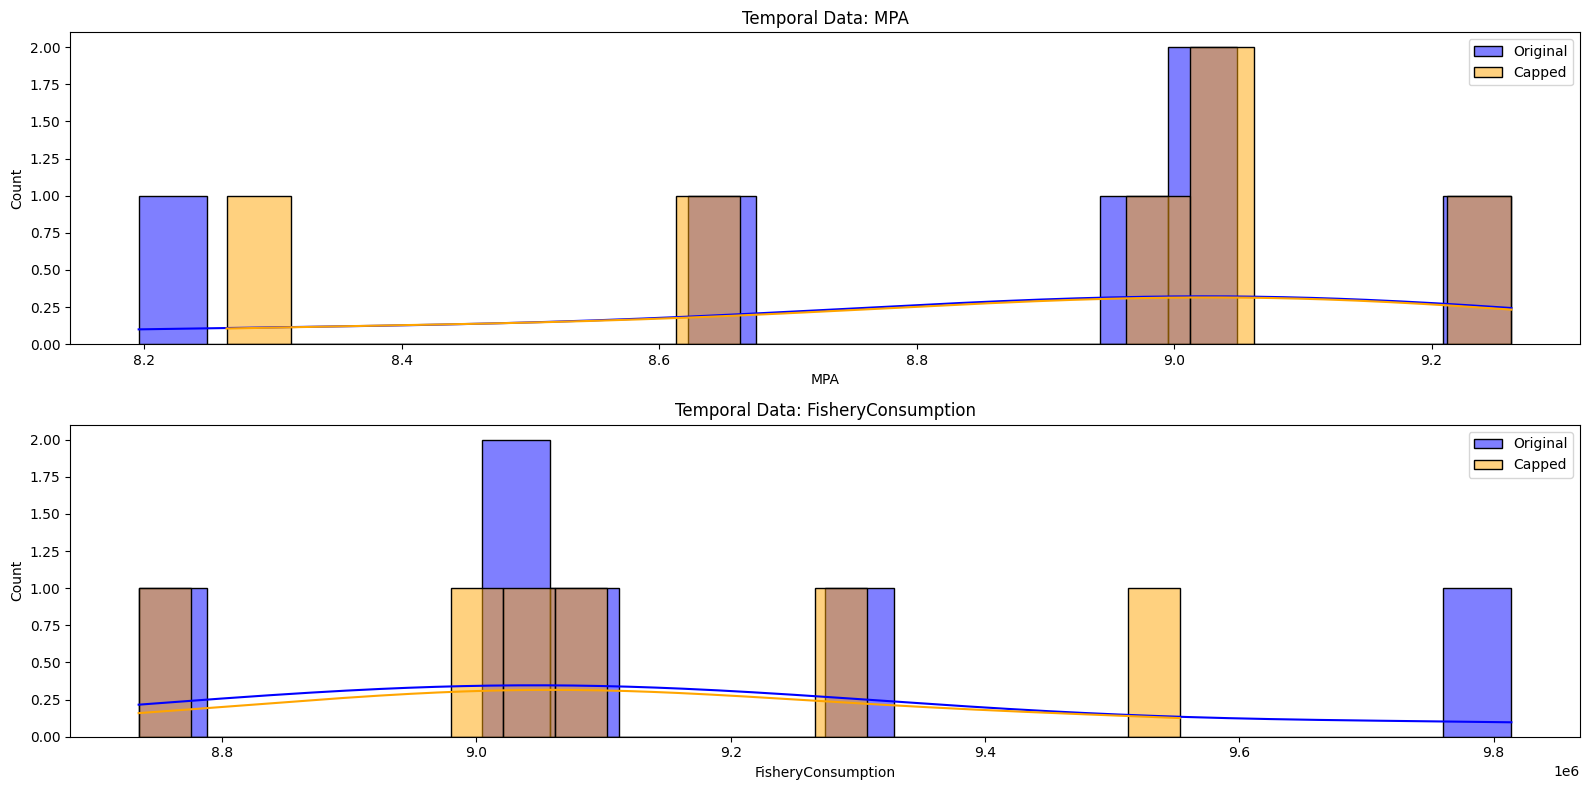

({'2017': 18.421052631578945,
  '2018': 18.421052631578945,
  '2019': 17.669172932330827,
  '2020': 18.796992481203006,
  '2021': 18.045112781954884,
  '2022': 17.669172932330827,
  '2017.1': 7.518796992481203,
  '2018.1': 7.142857142857142,
  '2019.1': 6.7669172932330826,
  '2020.1': 7.142857142857142,
  '2021.1': 6.015037593984962,
  '2022.1': 10.150375939849624},
 {'Fishery': 18.274111675126903, 'MPA': 7.614213197969544},
 {'MPA': 16.666666666666664, 'FisheryConsumption': 16.666666666666664})

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers, lower_bound, upper_bound

def cap_outliers(data, bounds):
    capped_data = data.copy()
    for col, (lower, upper) in bounds.items():
        capped_data[col] = np.where(data[col] < lower, lower, data[col])
        capped_data[col] = np.where(data[col] > upper, upper, capped_data[col])
    return capped_data
def process_outliers(df):
    outliers_info = {}
    bounds_info = {}

    for column in df.columns:
        if df[column].dtype != 'object':  
            outliers, lower, upper = find_outliers_iqr(df[column])
            outliers_info[column] = outliers
            bounds_info[column] = (lower, upper)

    return outliers_info, bounds_info

outliers_ogdata, bounds_ogdata = process_outliers(og_data.iloc[:, 1:]) 
outliers_spatial, bounds_spatial = process_outliers(spatial_data.iloc[:, 1:])  
outliers_temporal, bounds_temporal = process_outliers(temporal_data.iloc[:, 1:]) 

og_data_capped = cap_outliers(og_data.iloc[:, 1:], bounds_ogdata)
spatial_data_capped = cap_outliers(spatial_data.iloc[:, 1:], bounds_spatial)
temporal_data_capped = cap_outliers(temporal_data.iloc[:, 1:], bounds_temporal)

def plot_distributions(df, capped_df, title_prefix):
    plt.figure(figsize=(16, 8))

    for i, column in enumerate(df.columns):
        plt.subplot(2, len(df.columns) // 2, i + 1)
        sns.histplot(df[column], kde=True, bins=20, color='blue', label='Original', alpha=0.5)
        sns.histplot(capped_df[column], kde=True, bins=20, color='orange', label='Capped', alpha=0.5)
        plt.title(f'{title_prefix}: {column}')
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_distributions(og_data.iloc[:, 1:], og_data_capped, 'OG Data')
plot_distributions(spatial_data.iloc[:, 1:], spatial_data_capped, 'Spatial Data')
plot_distributions(temporal_data.iloc[:, 1:], temporal_data_capped, 'Temporal Data')
outlier_percentage_ogdata = {col: outliers_ogdata[col].mean() * 100 for col in outliers_ogdata}
outlier_percentage_spatial = {col: outliers_spatial[col].mean() * 100 for col in outliers_spatial}
outlier_percentage_temporal = {col: outliers_temporal[col].mean() * 100 for col in outliers_temporal}
outlier_percentage_ogdata, outlier_percentage_spatial, outlier_percentage_temporal

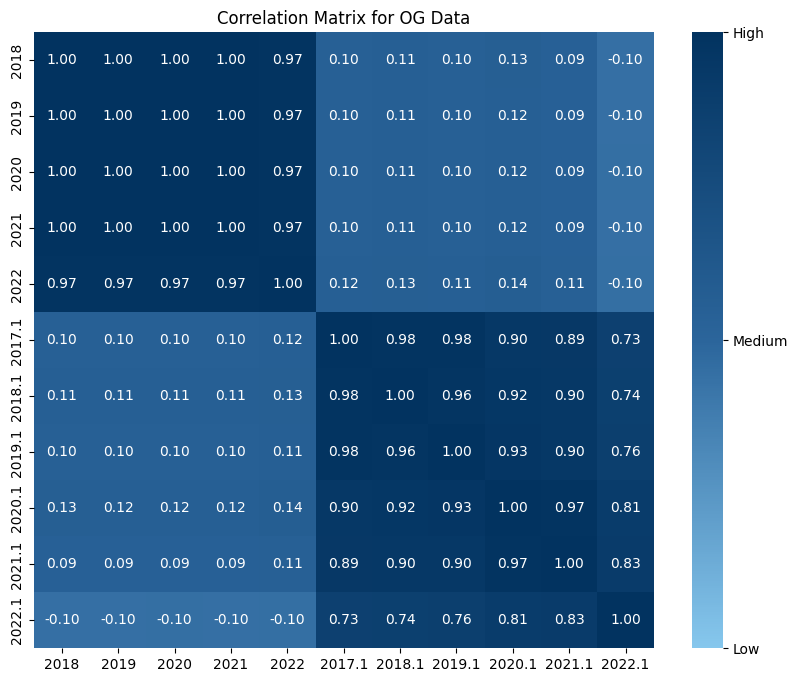

            2018      2019      2020      2021      2022    2017.1    2018.1  \
2018    1.000000  0.999582  0.999224  0.998880  0.973479  0.098521  0.110826   
2019    0.999582  1.000000  0.999564  0.999396  0.973574  0.098022  0.110301   
2020    0.999224  0.999564  1.000000  0.999496  0.972639  0.098168  0.110533   
2021    0.998880  0.999396  0.999496  1.000000  0.973790  0.097806  0.110169   
2022    0.973479  0.973574  0.972639  0.973790  1.000000  0.115601  0.128189   
2017.1  0.098521  0.098022  0.098168  0.097806  0.115601  1.000000  0.983931   
2018.1  0.110826  0.110301  0.110533  0.110169  0.128189  0.983931  1.000000   
2019.1  0.097242  0.096701  0.096750  0.096476  0.113920  0.977363  0.960013   
2020.1  0.125008  0.124936  0.124646  0.124057  0.141293  0.900887  0.915424   
2021.1  0.093234  0.092694  0.093291  0.092156  0.108008  0.886881  0.901395   
2022.1 -0.102432 -0.102839 -0.100535 -0.102666 -0.097072  0.731131  0.743382   

          2019.1    2020.1    2021.1   

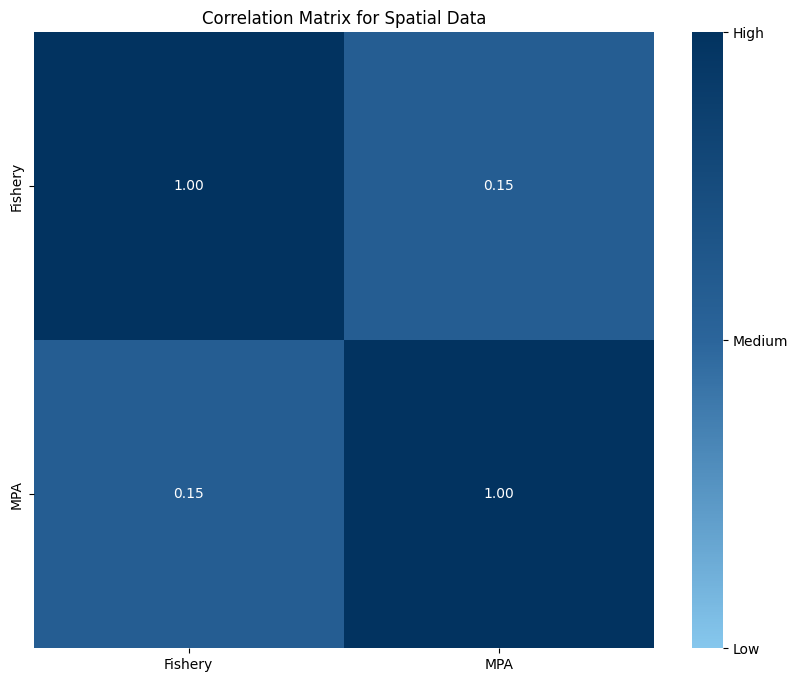

          Fishery       MPA
Fishery  1.000000  0.151304
MPA      0.151304  1.000000


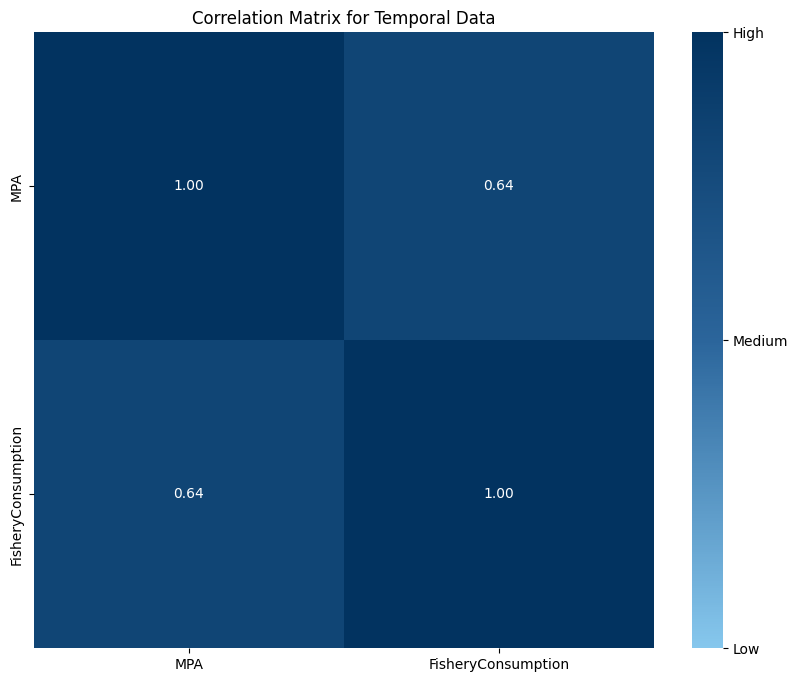

                         MPA  FisheryConsumption
MPA                 1.000000            0.641389
FisheryConsumption  0.641389            1.000000


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
def plot_correlation_matrix(df, title):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))

    colors = ['#86c7ed','#2B659B' ,'#023360']
    cmap = LinearSegmentedColormap.from_list('custom_gradient', colors, N=256)

    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2f', vmin=-1, vmax=1, center=0)
    cbar = heatmap.collections[0].colorbar
    cbar.set_ticks([-1, 0, 1])
    cbar.set_ticklabels(['Low', 'Medium', 'High'])
    plt.title(f'Correlation Matrix for {title}')

    plt.savefig(f'correlation_matrix_{title.replace(" ", "_").lower()}.png')

    plt.show()
    print(correlation_matrix)

plot_correlation_matrix(og_data_capped.iloc[:, 1:], 'OG Data')
plot_correlation_matrix(spatial_data_capped, 'Spatial Data')
plot_correlation_matrix(temporal_data_capped.iloc[1:, :], 'Temporal Data')


## Predictive Modeling


In [21]:
import pandas as pd
import os

cleaned_og_data_path = '/kaggle/working/cleaned_og_data.csv'
cleaned_spatial_data_path = '/kaggle/working/cleaned_spatial_data.csv'
cleaned_temporal_data_path = '/kaggle/working/cleaned_temporal_data.csv'

df = pd.read_csv(cleaned_temporal_data_path)
df.head()
x=df.iloc[:,[0,1]].values
y=df.iloc[:,2].values

Importing models from scikit-learn

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


1. Linear Regression:

Linear Regression - MSE: 16802972596.767115, R^2: 0.8494714866198155


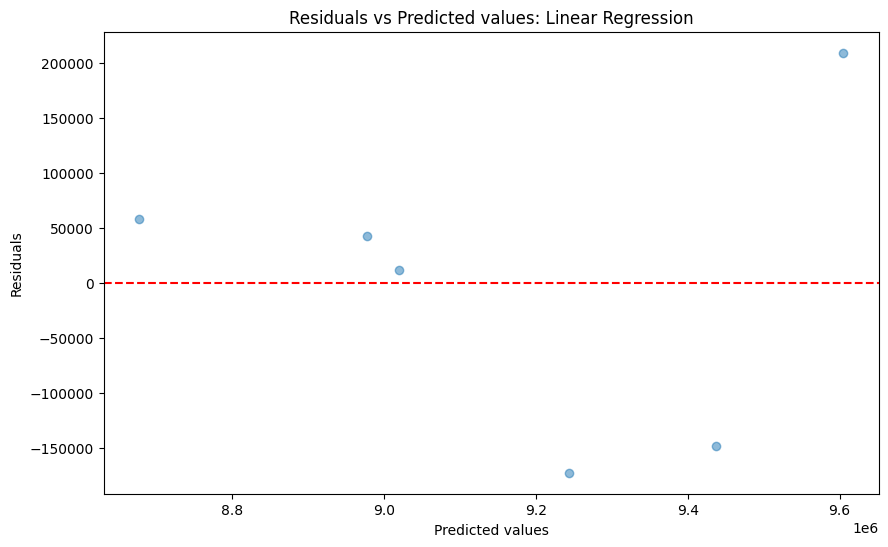

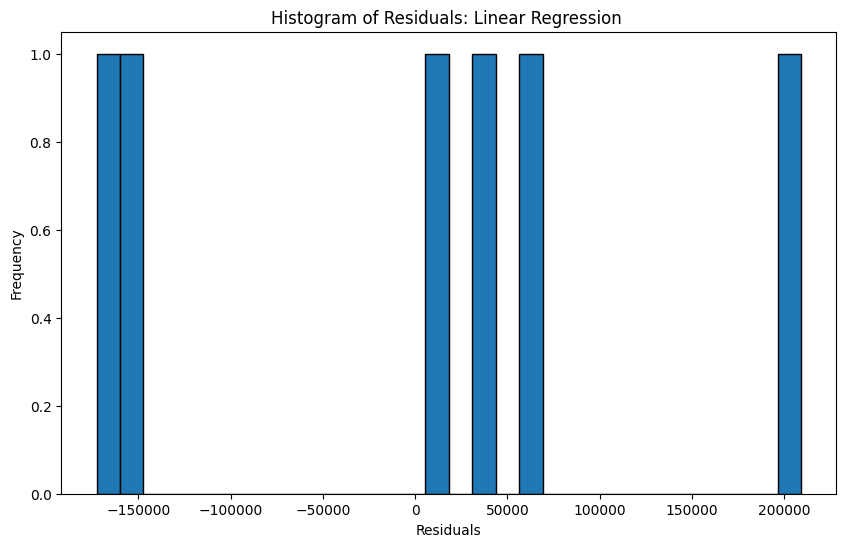

In [23]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Linear Regression - MSE: {mse}, R^2: {r2}")

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values: Linear Regression')
plt.show()
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals: Linear Regression ')
plt.show()

2. Ridge Regression

Ridge Regression - MSE: 18555397167.201897, R^2: 0.8337724867030264


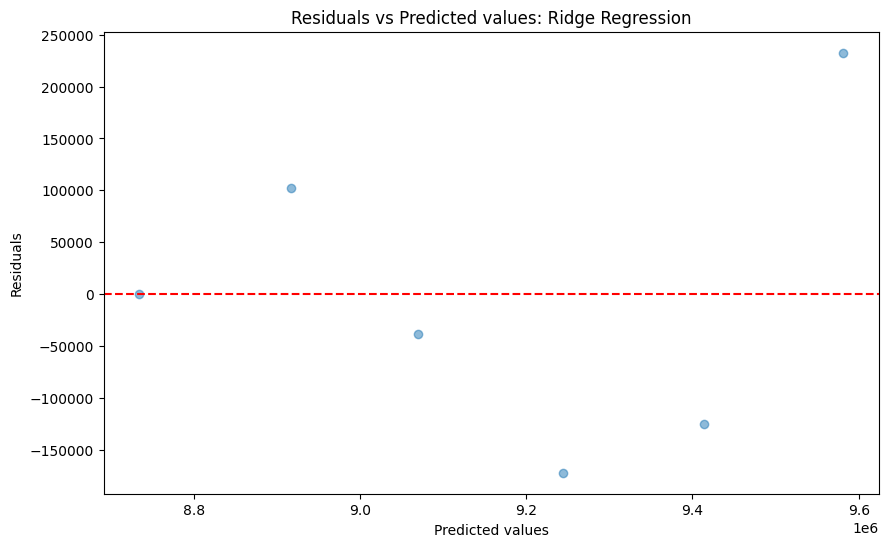

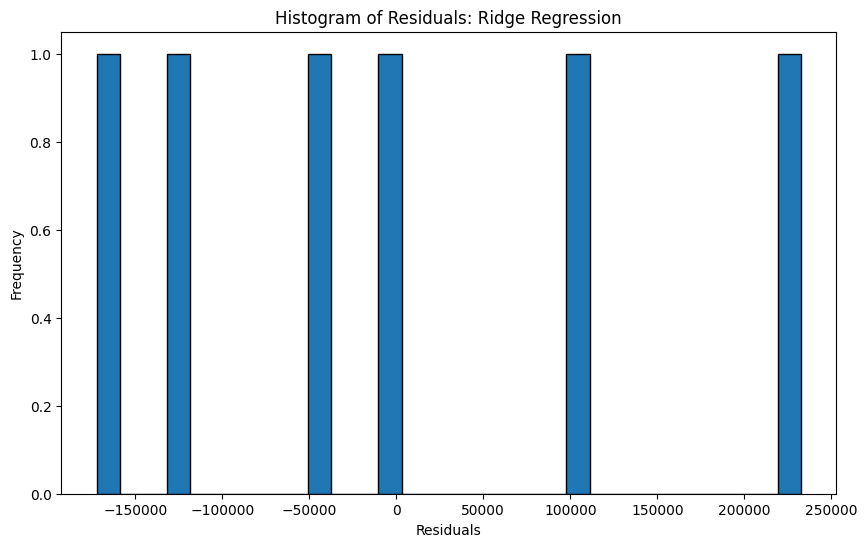

In [24]:
model = Ridge(alpha=1.0)   
model.fit(x, y)
 
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Ridge Regression - MSE: {mse}, R^2: {r2}")
 
model = Ridge(alpha=1.0)   
model.fit(x, y)
y_pred = model.predict(x)
 
residuals = y - y_pred
 
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values: Ridge Regression')
plt.show()
 
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals: Ridge Regression')
plt.show()

3. Lasso Regression

Lasso Regression - MSE: 16802972597.052603, R^2: 0.849471486617258


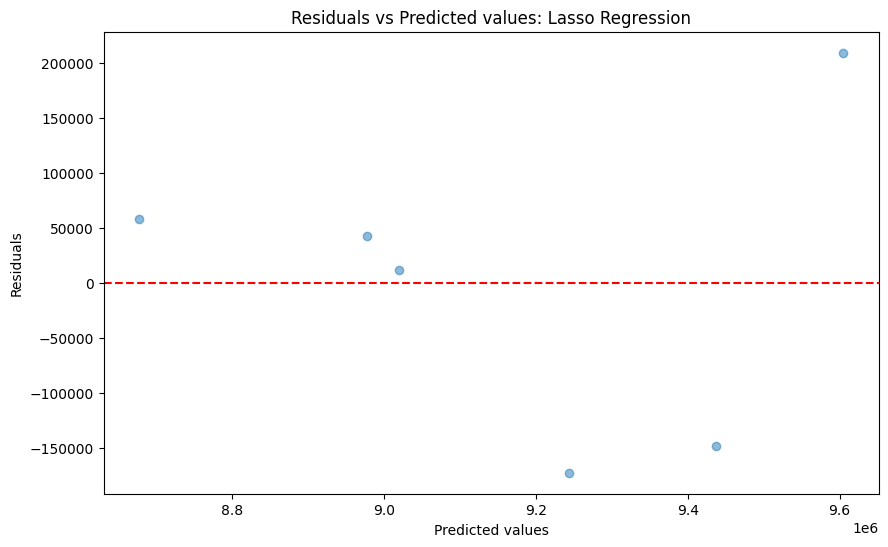

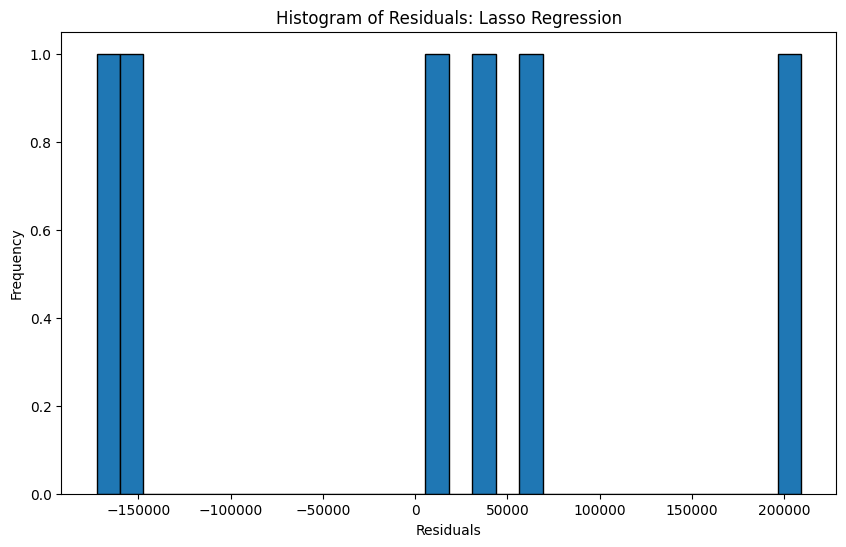

In [25]:
model = Lasso(alpha=0.1)
model.fit(x, y)
 
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Lasso Regression - MSE: {mse}, R^2: {r2}")
 
model = Lasso(alpha=1.0)
model.fit(x, y)
y_pred = model.predict(x)
  
residuals = y - y_pred
 
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values: Lasso Regression')
plt.show()
 
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals: Lasso Regression')
plt.show()

4. Decision Tree

Decision Tree - MSE: 0.0, R^2: 1.0


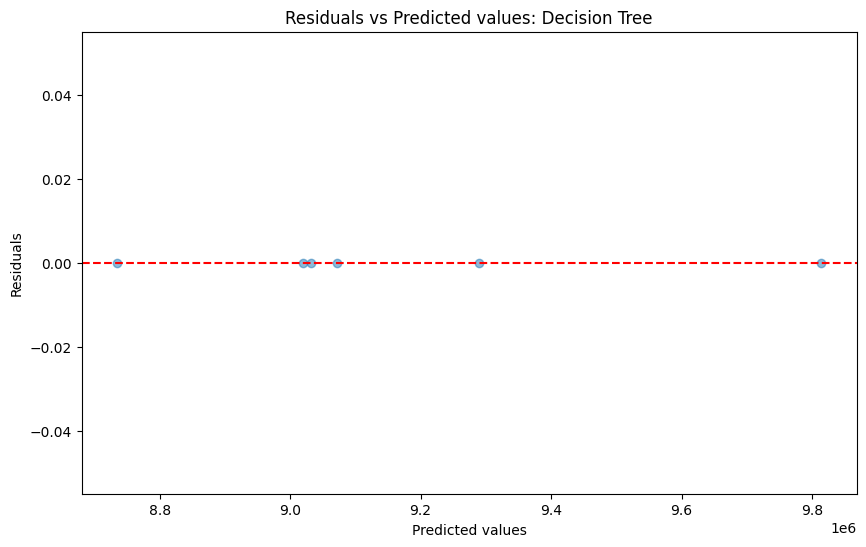

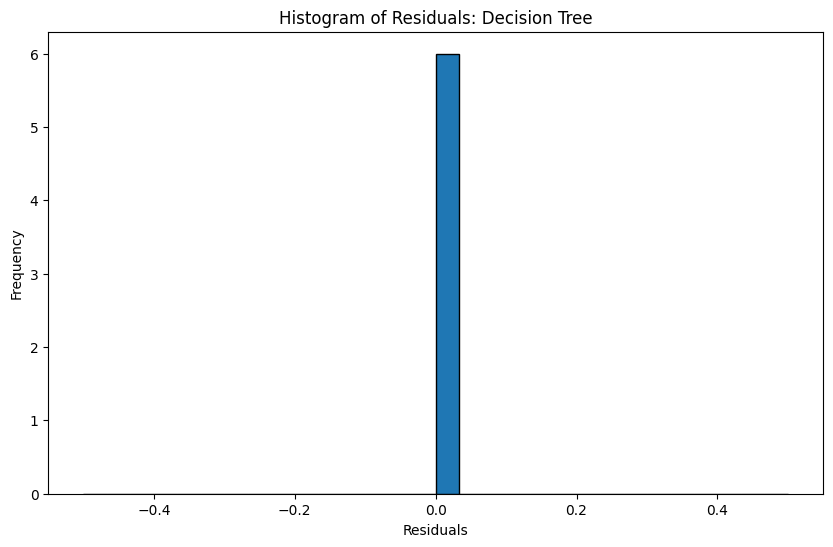

In [26]:
model = DecisionTreeRegressor()
model.fit(x, y)
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Decision Tree - MSE: {mse}, R^2: {r2}")
y_pred = model.predict(x)

residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values: Decision Tree')
plt.show()
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals: Decision Tree')
plt.show()

5. Random Forest

Random Forest - MSE: 10375048666.014395, R^2: 0.9070556925003441


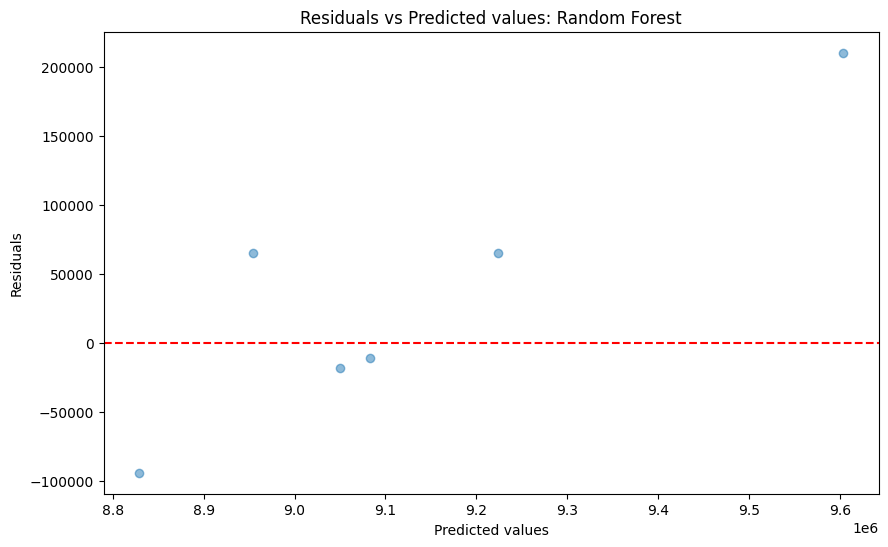

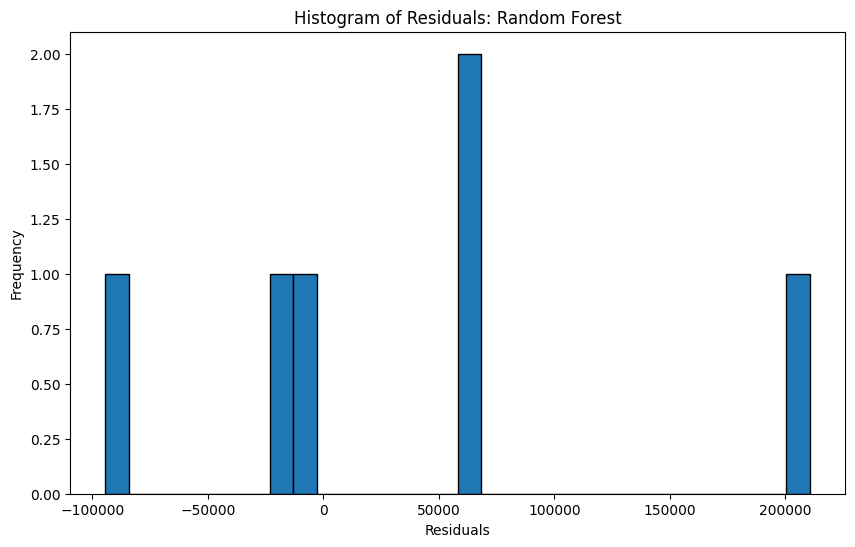

In [27]:
model = RandomForestRegressor(n_estimators=100)  
model.fit(x, y)
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Random Forest - MSE: {mse}, R^2: {r2}")

y_pred = model.predict(x)
residuals = y - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values: Random Forest')
plt.show()
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals: Random Forest')
plt.show()






6. SVM

Support Vector Machines - MSE: 123412975423.3538, R^2: -0.10558840796282265


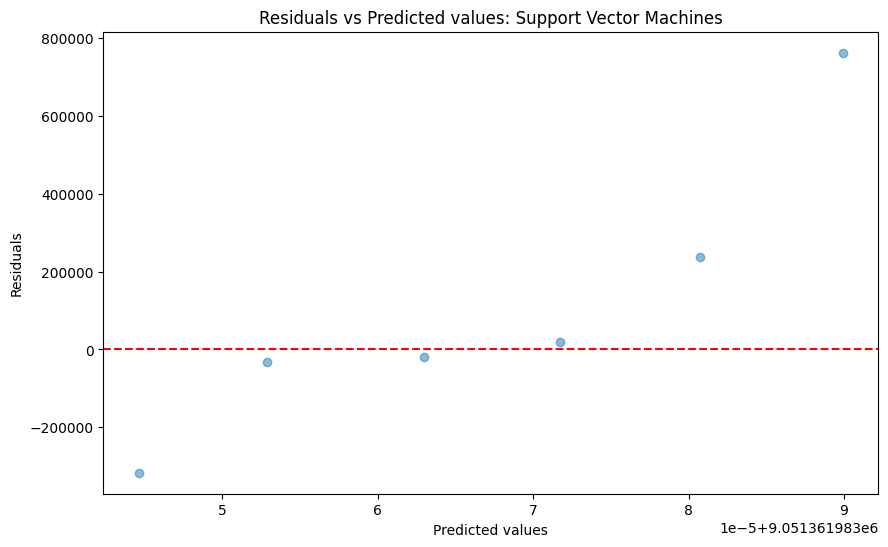

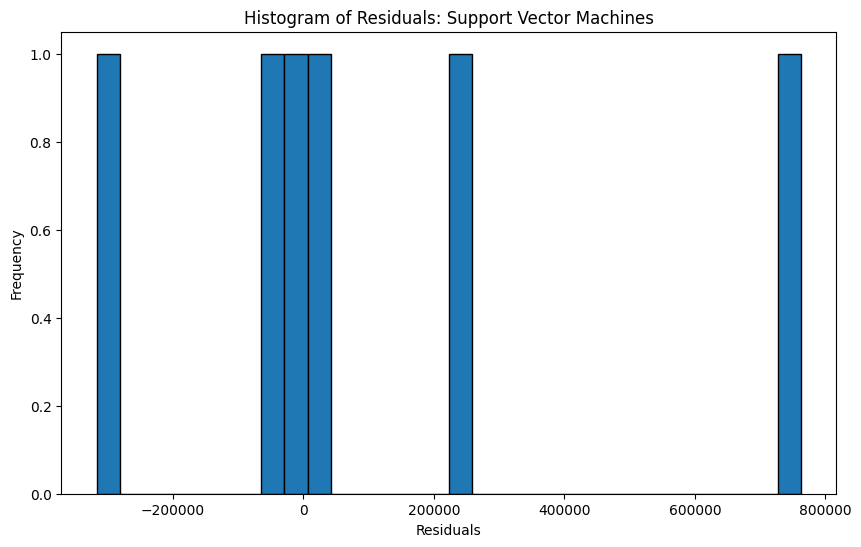

In [28]:
model = SVR(kernel='rbf')  
model.fit(x, y)
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Support Vector Machines - MSE: {mse}, R^2: {r2}")
y_pred = model.predict(x)
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values: Support Vector Machines')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals: Support Vector Machines')
plt.show()

6. KNN

k-Nearest Neighbors - MSE: 73801842659.17, R^2: 0.33885021854165487


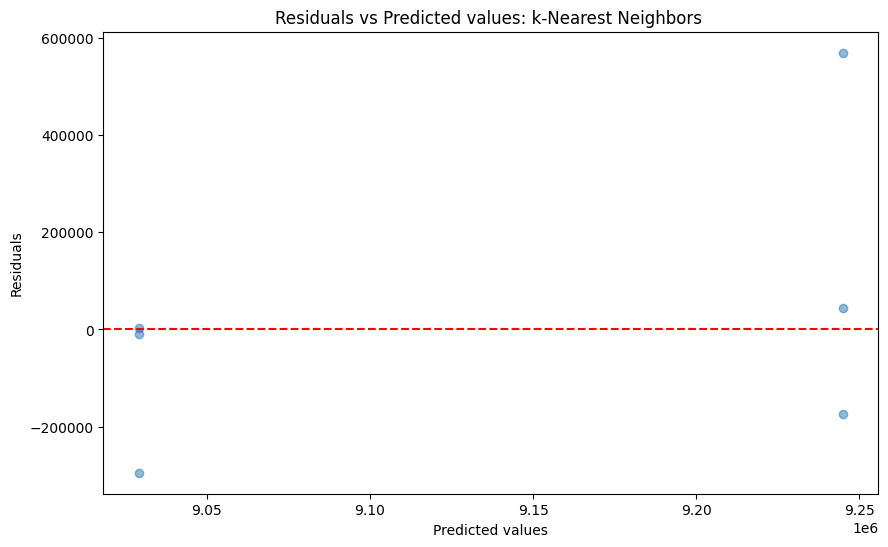

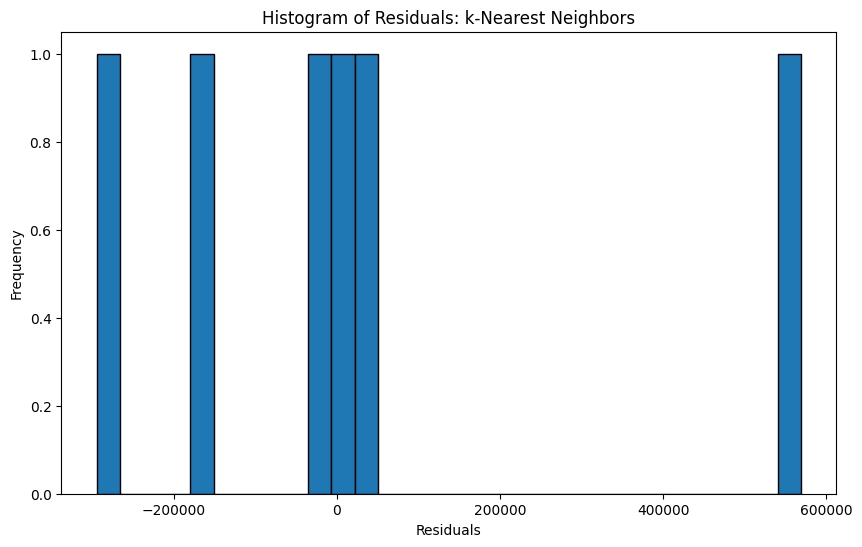

In [29]:
model = KNeighborsRegressor(n_neighbors=5)  
model.fit(x, y)
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"k-Nearest Neighbors - MSE: {mse}, R^2: {r2}")

y_pred = model.predict(x)

residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values: k-Nearest Neighbors ')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals: k-Nearest Neighbors')
plt.show()

7. Gradient Boosting

Gradient Boosting - MSE: 88.91215999527672, R^2: 0.9999999992034853


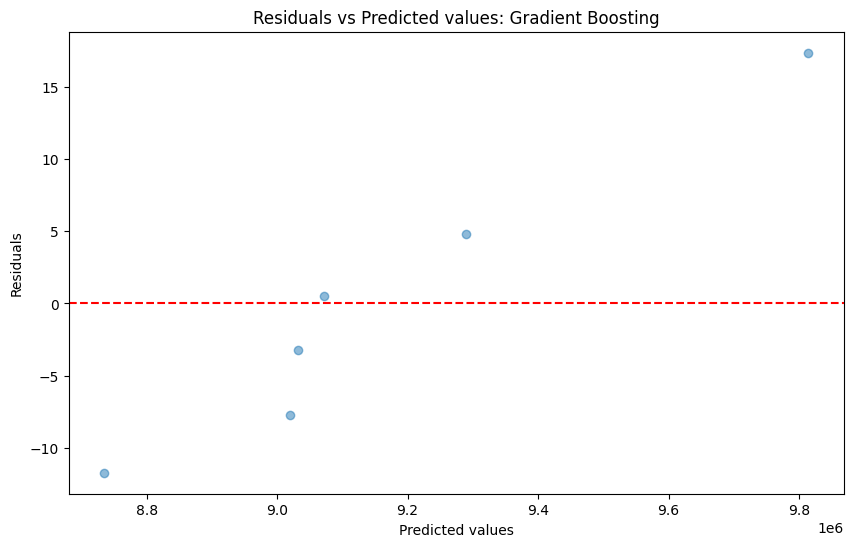

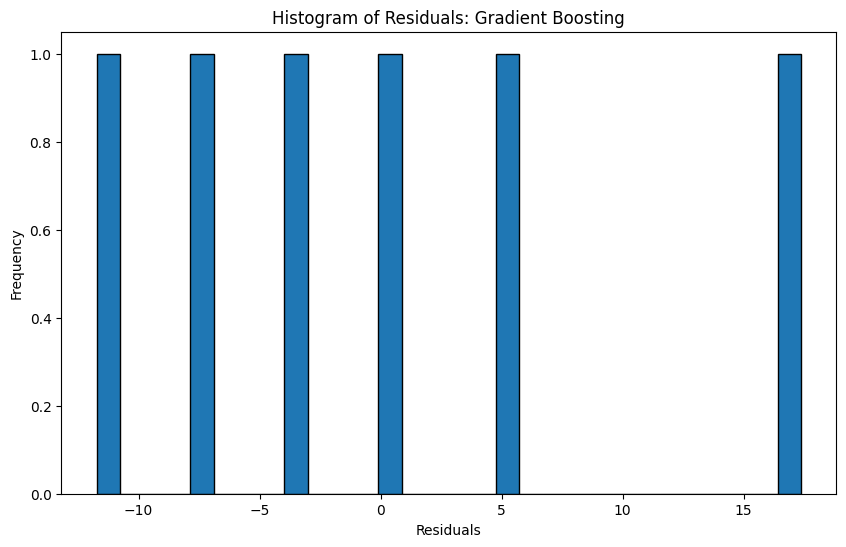

In [30]:
model = GradientBoostingRegressor(n_estimators=100)  
model.fit(x, y)
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Gradient Boosting - MSE: {mse}, R^2: {r2}")
y_pred = model.predict(x)

residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values: Gradient Boosting')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals: Gradient Boosting')
plt.show()



8. Bayesian Ridge

Bayesian Regression - MSE: 111626509921.4524, R^2: 2.661714182394803e-10


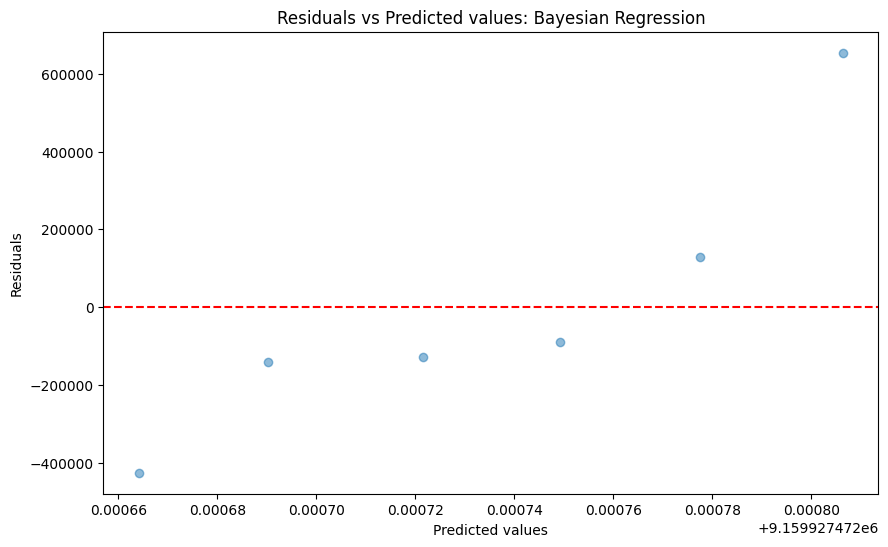

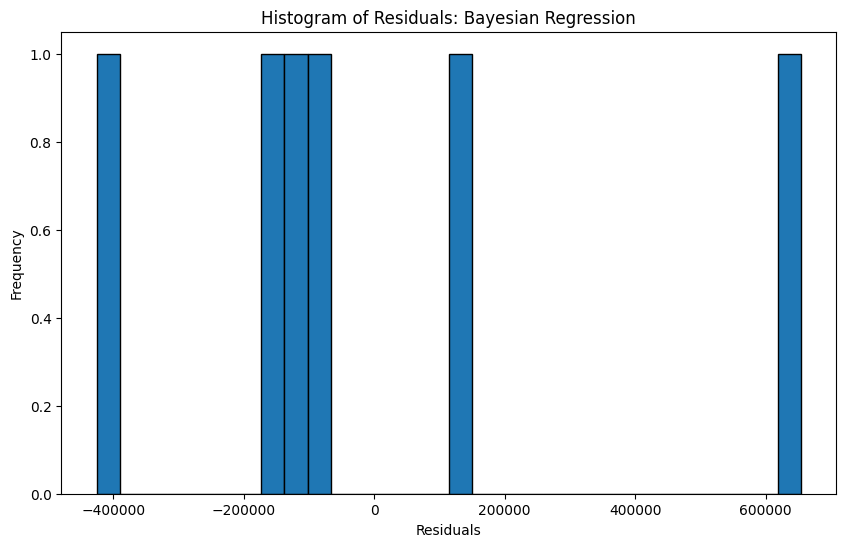

In [31]:
model = BayesianRidge()
model.fit(x, y)

y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Bayesian Regression - MSE: {mse}, R^2: {r2}")

y_pred = model.predict(x)

residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values: Bayesian Regression')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals: Bayesian Regression')
plt.show()

## Model Comparison

/tmp/ipykernel_24/3279021757.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['Models'], rotation=45, ha='right')


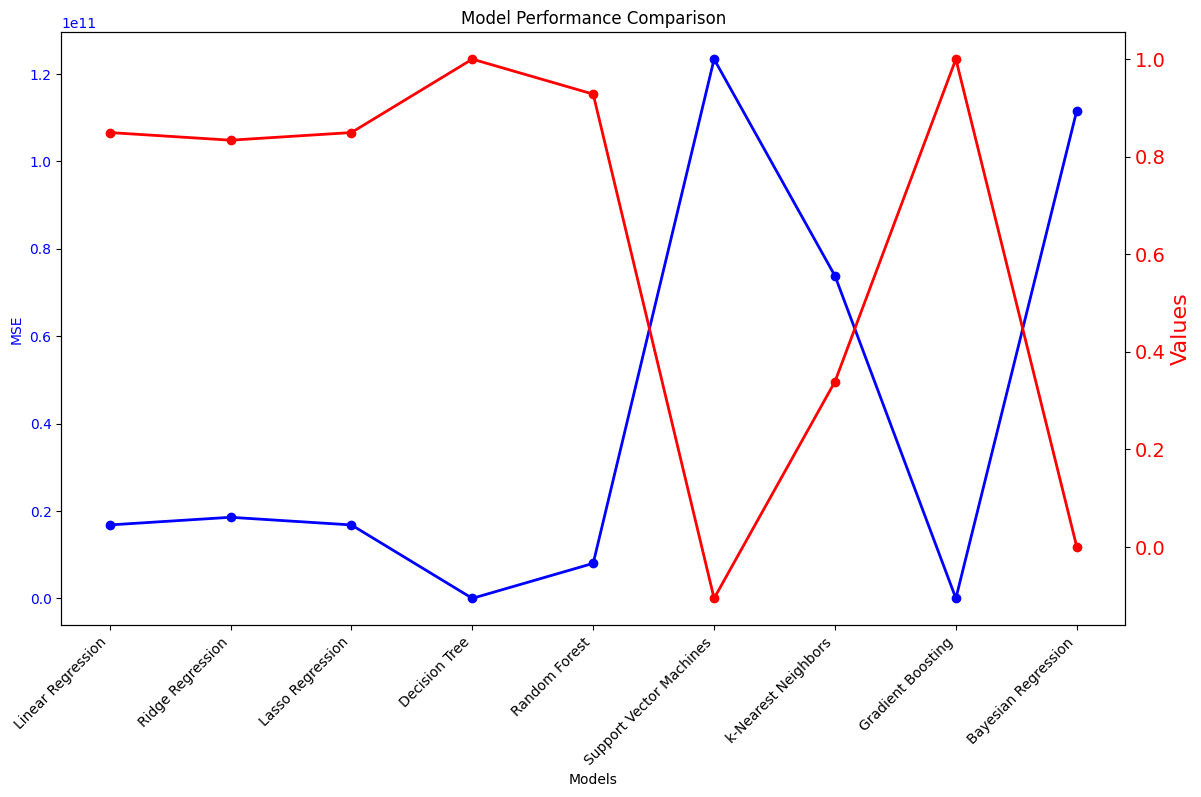

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay

import pandas as pd
data = {
    'Models': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree',
               'Random Forest', 'Support Vector Machines', 'k-Nearest Neighbors',
               'Gradient Boosting', 'Bayesian Regression'],
    'MSE': [16802972596.7, 18555397167.2, 16802972597.0, 0,
            8011076053.94, 123412975423.35, 73801842659.1,
            88.9121599953, 111626509921.45],
    'R2 Score': [0.8494714866, 0.8337724867, 0.8494714866, 1,
                 0.9282332122, -0.105588408, 0.3388502185,
                 1, 2.66E-10]
}

df = pd.DataFrame(data)
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(df['Models'], df['MSE'], color='b', marker='o', linestyle='-', linewidth=2, label='MSE')
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(df['Models'], rotation=45, ha='right')
ax2 = ax1.twinx()
ax2.plot(df['Models'], df['R2 Score'], color='r', marker='o', linestyle='-', linewidth=2, label='R2 Score')
ax2.set_ylabel('R2 Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.title('Sample Bar Plot', fontsize=20)
plt.xlabel('Category', fontsize=40)
plt.ylabel('Values', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Model Performance Comparison')
plt.show()
